# Klasifikasi Data Twitter Menggunakan Metode Support Vector Machine

## Autentifikasi

In [ ]:
# Install Tweepy
!pip install git+https://github.com/tweepy/tweepy.git

In [ ]:
import tweepy
print(tweepy.__version__)

4.10.0


In [ ]:
import tweepy
import csv

api_key = "ZwlfKRweDmJDt466qN6HxxGe3"
api_secret = "vYL9XZXRE9vOZqk6UD7LmzxudgDGF3xI571yzvaPRPAQqTBxjb"
access_token = "1468723837667737602-NaON6WfraYSzLdcUP0WaY8W1HLGZic" 
access_secret = "DmeRbRucoku4j6nEkOTUQTqzCSYuSzPuRJxGlCyKvSOq4"

auth = tweepy.OAuthHandler(api_key,api_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth)

try:
  api.verify_credentials()
  print("Autentikasi berhasil")
except:
  print("Autentikasi gagal")

Autentikasi berhasil


In [ ]:
# Buka file csv baru
csvFile = open('WaspadaCacarMonyet.csv', 'a+',newline='',encoding='utf-8')
csvWriter = csv.writer(csvFile, delimiter='|')
# header csv
csvWriter.writerow(["Screen Name", "Text", "Replies", "Retweets", "Likes"])

# menggunakan cursor/pagination
# item = jumlah data yang ingin diambil keseluruhan
# count = jumlah maksimal data tiap halaman
# Masukkan setiap tweet kedalam row csv
for tweet in tweepy.Cursor(api.search_tweets, "WaspadaCacarMonyet", count=100, lang="id").items(1000):
    print(tweet.user.screen_name, tweet.text,tweet.in_reply_to_status_id, tweet.retweet_count, tweet.favorite_count)
    # Write a row to the CSV file. I use encode UTF-8
    tweets = [tweet.user.screen_name, tweet.text.encode('utf-8'),tweet.in_reply_to_status_id, tweet.retweet_count, tweet.favorite_count]
    csvWriter.writerow(tweets)
# Tutup csv
csvFile.close()

MyNameIsUnge RT @adisuryanto97: Cacar monyet ini ternyata sangat berbahaya kita harus hati hati gaes.Jaga kesehatan masing masing.
#WaspadaCacarMonyet
h… None 8 0
MyNameIsUnge RT @AzadiMinggz: Ayo #WaspadaCacarMonyet jangan sampai lengah ya guys, jangan sampe ini jadi pandemi di Indonesia lagi deh.

https://t.co/N… None 25 0
MyNameIsUnge RT @maulanaireng12: harus ttp waspada Cacar monyet bikin bentol bentol parah gitu lho... penyebarannya bisa lewat droplets juga katanya #Wa… None 11 0
ooooohm_ Izin tags: hujan bulan juni pancasila rom 128gb soekarno #waspadacacarmonyet #InstitusiBangsatBangsa https://t.co/e5NhbnAEYg None 0 0
MyNameIsUnge RT @YohanessssW: Fakta terkait #cacarmonyet yang perlulah semua saudara-saudari ketahui👇
#WaspadaCacarMonyet
#IndonesiaSehatIndonesiaHebat… None 309 0
gisaille RT @budapevst: Upaya pencegahan di bandara dan pelabuhan ini sangat penting karena negara Singapura sudah terjangkit cacar monyet dan negar… None 2 0
Nr53N74H7N RT @amybrow2121: Gejalanya itu d

## Read data csv 

In [1]:
#install Sastrawi
!pip install pysastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 13.3 MB/s 


In [118]:
# Baca csv dengan pandas
import pandas as pd

df = pd.read_csv("cacar_monyet_sentiment.csv", sep=',')
df

,Screen Name,Text,Replies,Retweets,Likes,Sentiment
0,MyNameIsUnge,b'RT @adisuryanto97: Cacar monyet ini ternyata...,NaN,8.0,0.0,Positif
1,MyNameIsUnge,b'RT @AzadiMinggz: Ayo #WaspadaCacarMonyet jan...,NaN,25.0,0.0,Positif
2,MyNameIsUnge,b'RT @maulanaireng12: harus ttp waspada Cacar ...,NaN,11.0,0.0,Positif
3,ooooohm_,b'Izin tags: hujan bulan juni pancasila rom 12...,NaN,0.0,0.0,Netral
4,MyNameIsUnge,b'RT @YohanessssW: Fakta terkait #cacarmonyet ...,NaN,309.0,0.0,Netral
...,...,...,...,...,...,...
849,Cie410,b'Yah yang abis berpergian keluar kota/negeri ...,NaN,0.0,0.0,Positif
850,Cut_mey9,b'Pemerintah Indonesia perlu waspada akan kons...,NaN,0.0,0.0,Negatif
851,Gani63520115,b'Harus #WaspadaCacarMonyet ya guys jangan sam...,NaN,0.0,0.0,Positif
852,Happiness225_,b'Kontak fisik dengan hewan pengerat atau prim...,NaN,0.0,0.0,Positif


## EDA (Explanatory Data Analysis)

In [116]:
# check missing value
df.isnull().sum()

Screen Name      0
Text             0
Replies        852
Retweets        12
Likes           12
Sentiment        0
dtype: int64

In [117]:
# cek jumlah nilai positif, negatif dan netral
df['Sentiment'].value_counts()

Positif    689
Netral     122
Negatif     43
Name: Sentiment, dtype: int64

## Preprocessing

In [119]:
#import regex
import re

# import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# kamus normalisasi
norm = {'pgn':'ingin', 'bp':'bapak', 'dg':'dengan', 'gnt':'ganti', 'kmarin':'kemarin', 
        'yg':'yang', 'koq':'kok', 'mrk':'mereka', 'trus':'terus', 'ttg':'tentang', 'tdk':'tidak', 'hrs':'harus', 'jd':'jadi', 
        'atw':'atau', 'sbg':'sebagai', 'tsb':'tersebut', 'bwh':'bawah', 'bkn':'bukan', 'ttp':'tetap', 'blm':'belum', 'bnyk':'banyak',
        'jd':'jadi'}

# daftar kata yang dihapus
hapus = ["b'RT", "b RT", "a\\", '\\n', "b'"]

# kamus stopword
stop_factory = StopWordRemoverFactory()
stop_remover = stop_factory.create_stop_word_remover()

#stopword tambahan
stopwords_custom = ['gak','kadang']
stopwords = StopWordRemoverFactory().get_stop_words()
new_stopwords = stopwords + stopwords_custom
new_array = ArrayDictionary(new_stopwords)
stopwords_remover_new = StopWordRemover(new_array)

# stemmer
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

def preprocess(str_text):
  # 1. Hapus hashtag (#..) - menggunakan regular expression
  str_text = re.sub(r'#[\w]+',' ',str_text)
  # 2. Menghapus kata-kata tertentu (sesuai konteks)
  for a in hapus:
    str_text = str_text.replace(a, "")
  # 3. Hapus URL xf\
  str_text = re.sub(r'xf\S+',' ',str_text)
  # 4. Hapus URL xc\
  str_text = re.sub(r'xc\S+',' ',str_text)
  # 5. Hapus URL xe\
  str_text = re.sub(r'xe\S+',' ',str_text)
  # 6. Hapus URL http\
  str_text = re.sub(r'http\S+',' ',str_text)
  # 7. Hapus mention (b'@..) - menggunakan regular expression
  str_text = re.sub(r"b'@[\w]+",' ',str_text)
  # 8. Hapus mention (@..) - menggunakan regular expression
  str_text = re.sub(r"@[\w]+",' ',str_text)
  # 9. Hapus non-printable chars, tanda baca, angka (alias hapus selain huruf)
  str_text = re.sub(r'[^a-zA-Z]+',' ',str_text)
  # 10. Normalisasi kata (membuat penulisan menjadi standar)
  # ----- caranya menggunakan kamus normalisasi yang sudah dibuat
  # 11. Casefolding - mengubah ke case yang sama semua (misal huruf kecil semua)
  str_text = str_text.lower()
  for a in norm:
    str_text = str_text.replace(a,norm[a])
  # 12. Menghapus Stopwords
  str_text = stopwords_remover_new.remove(str_text)
  # # 13. stemming
  str_text = stemmer.stem(str_text)
  return str_text



df['Text_clean'] = df['Text'].apply(lambda x: preprocess(x))
#tampil tabel
df

,Screen Name,Text,Replies,Retweets,Likes,Sentiment,Text_clean
0,MyNameIsUnge,b'RT @adisuryanto97: Cacar monyet ini ternyata...,NaN,8.0,0.0,Positif,cacar monyet bahaya hati hati gaes jaga sehat
1,MyNameIsUnge,b'RT @AzadiMinggz: Ayo #WaspadaCacarMonyet jan...,NaN,25.0,0.0,Positif,ayo lengah guys sampe pandemi indonesia deh
2,MyNameIsUnge,b'RT @maulanaireng12: harus ttp waspada Cacar ...,NaN,11.0,0.0,Positif,waspada cacar monyet bikin bentol bentol parah...
3,ooooohm_,b'Izin tags: hujan bulan juni pancasila rom 12...,NaN,0.0,0.0,Netral,izin tags hujan juni pancasila rom gb soekarno
4,MyNameIsUnge,b'RT @YohanessssW: Fakta terkait #cacarmonyet ...,NaN,309.0,0.0,Netral,fakta kait perlu saudara saudari tahu
...,...,...,...,...,...,...,...
849,Cie410,b'Yah yang abis berpergian keluar kota/negeri ...,NaN,0.0,0.0,Positif,yah abis pergi kota negeri pulang lupa medical...
850,Cut_mey9,b'Pemerintah Indonesia perlu waspada akan kons...,NaN,0.0,0.0,Negatif,perintah indonesia waspada konspirasi as riset...
851,Gani63520115,b'Harus #WaspadaCacarMonyet ya guys jangan sam...,NaN,0.0,0.0,Positif,guys sampe lengah ayo masker dipake kalo rumah
852,Happiness225_,b'Kontak fisik dengan hewan pengerat atau prim...,NaN,0.0,0.0,Positif,kontak fisik hewan erat primata sakit cacar mo...


In [120]:
# Hilangkan data duplikat
df = df.drop_duplicates(subset=['Text_clean'])
df

,Screen Name,Text,Replies,Retweets,Likes,Sentiment,Text_clean
0,MyNameIsUnge,b'RT @adisuryanto97: Cacar monyet ini ternyata...,NaN,8.0,0.0,Positif,cacar monyet bahaya hati hati gaes jaga sehat
1,MyNameIsUnge,b'RT @AzadiMinggz: Ayo #WaspadaCacarMonyet jan...,NaN,25.0,0.0,Positif,ayo lengah guys sampe pandemi indonesia deh
2,MyNameIsUnge,b'RT @maulanaireng12: harus ttp waspada Cacar ...,NaN,11.0,0.0,Positif,waspada cacar monyet bikin bentol bentol parah...
3,ooooohm_,b'Izin tags: hujan bulan juni pancasila rom 12...,NaN,0.0,0.0,Netral,izin tags hujan juni pancasila rom gb soekarno
4,MyNameIsUnge,b'RT @YohanessssW: Fakta terkait #cacarmonyet ...,NaN,309.0,0.0,Netral,fakta kait perlu saudara saudari tahu
...,...,...,...,...,...,...,...
845,WikaSal890,b'Bahaya banget 2022 ini jadi 2021 ver.2 #Wasp...,NaN,0.0,1.0,Positif,bahaya banget ver rame bahas ayo cari cari pence
847,yuliantumba,b'Bener sih berita cacar monyet masi simpang s...,NaN,0.0,0.0,Positif,bener sih berita cacar monyet mas simpang siur...
849,Cie410,b'Yah yang abis berpergian keluar kota/negeri ...,NaN,0.0,0.0,Positif,yah abis pergi kota negeri pulang lupa medical...
852,Happiness225_,b'Kontak fisik dengan hewan pengerat atau prim...,NaN,0.0,0.0,Positif,kontak fisik hewan erat primata sakit cacar mo...


In [121]:
# Tampilkan kolom yang akan digunakan untuk klasifikasi
df = df[["Text_clean", "Sentiment"]]
df

,Text_clean,Sentiment
0,cacar monyet bahaya hati hati gaes jaga sehat,Positif
1,ayo lengah guys sampe pandemi indonesia deh,Positif
2,waspada cacar monyet bikin bentol bentol parah...,Positif
3,izin tags hujan juni pancasila rom gb soekarno,Netral
4,fakta kait perlu saudara saudari tahu,Netral
...,...,...
845,bahaya banget ver rame bahas ayo cari cari pence,Positif
847,bener sih berita cacar monyet mas simpang siur...,Positif
849,yah abis pergi kota negeri pulang lupa medical...,Positif
852,kontak fisik hewan erat primata sakit cacar mo...,Positif


## Klasifikasi Data teks

### Pembagian data latih dan data uji

In [122]:
from sklearn.model_selection import train_test_split

feature = df['Text_clean']
target = df['Sentiment']
# Split data dengan rasio data training=0.7 dan data testing=0.3
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.3,random_state=1)

### Vektorisasi dengan TF-IDF Vectorizer

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec_model = TfidfVectorizer().fit(x_train)
vec_data = vec_model.transform(x_train)

In [124]:
dftfidf = pd.DataFrame(vec_data.toarray())
dftfidf

,0,1,2,3,4,5,6,7,8,9,...,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.375773,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537,0.0,0.0,0.0,0.0,0.339295,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Membuat model klasifikasi dengan metode SVM

In [125]:
# Import fungsi SVM dari sklearn
from sklearn.svm import SVC

cls_model_svc = SVC().fit(vec_data,y_train)
# Hitung accuracy model klasifikasi
cls_model_svc.score(vec_data,y_train)

0.9630314232902033

## Testing model dengan data test

### Vektorisasi Data Test

In [126]:
test_data = vec_model.transform(x_test)

### Klasifikasi data test dan Confusion Matrix

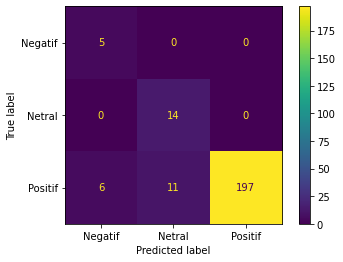

In [127]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

pred = cls_model_svc.predict(test_data)
cm = confusion_matrix(pred,y_test)
ConfusionMatrixDisplay(cm,display_labels=['Negatif','Netral', 'Positif']).plot()

In [128]:
# Accuracy model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, pred))

0.927038626609442


### Uji Coba Klasifikasi Sentimen dengan model yang sudah dibuat

In [129]:
teks = ["Semoga penyakit ini tidak menjadi pandemi amiin",
        "terlepas dari benar atau tidaknya berita tentang monkeypox diluaran. kalian jangan sampai menelan berita mentah-mentah",
        "waahh ada konspirasi apalagi ini gaes. Kemaren covid, sekarang muncul yang namanya cacar monyet."]

# preprocessing
teks_clean = [preprocess(a) for a in teks]

# vektorisasi
teks_vec = vec_model.transform(teks_clean)

# prediksi/klasifikasi
teks_pred2 = cls_model_svc.predict(teks_vec)

# hasil prediksi
print("")
for idx,i in enumerate(teks_pred2):
  print("Sentimen kalimat ke " + str(idx) + " dengan metode SVC adalah " + i)


Sentimen kalimat ke 0 dengan metode SVC adalah Positif
Sentimen kalimat ke 1 dengan metode SVC adalah Netral
Sentimen kalimat ke 2 dengan metode SVC adalah Negatif
